In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
import statsmodels.api as sm 

In [3]:
from statsmodels.api import (add_constant,OLS, Logit, )

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc,  RocCurveDisplay

In [4]:
from math import (log, exp)
from itertools import combinations

In [5]:
cust_df = pd.read_csv("customer.csv")

sales_df = pd.read_csv("sales.csv")

sales_df = sales_df.iloc[:,1:]

In [6]:
cust_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
sales_df.head()

,area1_sales,area2_sales,area3_sales,total_sales
0,0.79,0.80,0.02,1.75
1,0.83,0.08,0.18,1.75
2,0.85,0.01,0.22,1.75
3,1.25,0.00,0.03,1.75
4,0.72,0.04,0.10,1.74


Q1 write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.

In [8]:
x = sales_df.iloc[:,0:3]
y = sales_df.iloc[:,3]

In [9]:
x_vars = add_constant(x,has_constant= "add")

model = OLS(y, x_vars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:56:04   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2601      0.008     30.743      

##### with interaction 

In [10]:
x_vars

,const,area1_sales,area2_sales,area3_sales
0,1.0,0.79,0.80,0.02
1,1.0,0.83,0.08,0.18
2,1.0,0.85,0.01,0.22
3,1.0,1.25,0.00,0.03
4,1.0,0.72,0.04,0.10
...,...,...,...,...
2995,1.0,0.20,0.00,0.07
2996,1.0,0.28,0.00,0.04
2997,1.0,0.00,0.49,0.00
2998,1.0,0.07,0.09,0.07


In [11]:
interactions = PolynomialFeatures(interaction_only=True, degree= 3)
X_interactions = interactions.fit_transform(x_vars.iloc[:,1:])

                                 

In [12]:
X_interactions = pd.DataFrame(X_interactions,columns=interactions.get_feature_names_out())
X_interactions.rename(columns= {"1":"const"}, inplace=True)

In [13]:
X_interactions.head()

,const,area1_sales,area2_sales,area3_sales,area1_sales area2_sales,area1_sales area3_sales,area2_sales area3_sales,area1_sales area2_sales area3_sales
0,1.0,0.79,0.80,0.02,0.6320,0.0158,0.0160,0.012640
1,1.0,0.83,0.08,0.18,0.0664,0.1494,0.0144,0.011952
2,1.0,0.85,0.01,0.22,0.0085,0.1870,0.0022,0.001870
3,1.0,1.25,0.00,0.03,0.0000,0.0375,0.0000,0.000000
4,1.0,0.72,0.04,0.10,0.0288,0.0720,0.0040,0.002880


In [14]:
model_interactions = OLS(y, X_interactions).fit()

print(model_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:56:06   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Q2 Develop a full Logistic Regression Model 

In [15]:
x = cust_df.iloc[:,1:4]
y = cust_df.iloc[:,4]

In [16]:
x = pd.concat([x,pd.get_dummies(x.Gender,drop_first= True)], axis= 1)
x.drop(columns=['Gender'], inplace= True)


x =add_constant(x,has_constant= "add")

In [17]:
log_reg_full = Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [18]:
print(log_reg_full.summary2())

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.471     
Dependent Variable:  Purchased        AIC:              283.8432  
Date:                2023-01-21 18:56 BIC:              299.8091  
No. Observations:    400              Log-Likelihood:   -137.92   
Df Model:            3                LL-Null:          -260.79   
Df Residuals:        396              LLR p-value:      5.4877e-53
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const           -12.7836   1.3592 -9.4049 0.0000 -15.4477 -10.1196
Age               0.2370   0.0264  8.9839 0.0000   0.1853   0.2887
EstimatedSalary   0.0000   0.0000  6.6585 0.0000   0.0000   0.0000
Male              0.3

###### Q2 Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [19]:
def run_logit(x, y, cols=['const','Age','EstimatedSalary','Male']):
    """
    x: x variables 
    y: y variable 
    
    Runs logit y ~ x where x in the dataframe of xvariables and y is the response variable
    
    Returns the model performance metrics as a dataframe to support model selection
    
    """
    x = x.loc[:,cols]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=25)
    
    log_reg = Logit(y_train,x_train).fit()
    
    prsquare = log_reg.prsquared
    AIC = log_reg.aic
    BIC = log_reg.bic
    
    y_preds = log_reg.predict(x_test)
    
    y_preds_log = pd.Series([log(x) for x in y_preds],  index= y_test.index)
    y_preds_log_1 = pd.Series([log(1-x) for x in y_preds], index= y_test.index)
    
    null_divience_d0 =  -2*sum(y_test*log(np.mean(y_test)) + (1-y_test)*log(1-np.mean(y_test)))
    divience_d = -2*sum(y_test*y_preds_log + (1-y_test)*y_preds_log_1)
    
    oosrsquared = 1-(divience_d/null_divience_d0)
    
    key = "-".join(x.columns)
    
    print(log_reg.summary())
    
    return  pd.DataFrame(data=[key,prsquare,AIC,BIC,oosrsquared],index=['Key','prsquared','AIC','BIC','oosrsquared']).transpose()
    

In [20]:
all_variables = run_logit(x,y)

Optimization terminated successfully.
         Current function value: 0.346826
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4704
Time:                        18:56:07   Log-Likelihood:                -110.98
converged:                       True   LL-Null:                       -209.55
Covariance Type:            nonrobust   LLR p-value:                 1.758e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.7443      1.496     -8.520      0.000     -15.676      -9.812
Age           

In [21]:
thecols = list(x.columns)
collist = []
thecols.remove('const')


for i in range(1,4):
    comb_list = list(combinations(thecols,i))
    collist.append(comb_list)

In [22]:
collist

[[('Age',), ('EstimatedSalary',), ('Male',)],
 [('Age', 'EstimatedSalary'), ('Age', 'Male'), ('EstimatedSalary', 'Male')],
 [('Age', 'EstimatedSalary', 'Male')]]

In [23]:
all_col_conbs = [['const','Age', 'EstimatedSalary'],
                 ['const','Age', 'Male'],
                 ['const','EstimatedSalary', 'Male'],
                 ['const','Age'],
                 ['const','EstimatedSalary'],
                 ['const','Male']
                ]

In [24]:
for i in all_col_conbs:
   all_variables = pd.concat([all_variables,run_logit(x,y,cols=i)], axis = 0, ignore_index=True) 

Optimization terminated successfully.
         Current function value: 0.349748
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4659
Time:                        18:56:08   Log-Likelihood:                -111.92
converged:                       True   LL-Null:                       -209.55
Covariance Type:            nonrobust   LLR p-value:                 3.978e-43
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.2357      1.414     -8.653      0.000     -15.007      -9.464
Age           

In [25]:
all_variables

,Key,prsquared,AIC,BIC,oosrsquared
0,const-Age-EstimatedSalary-Male,0.470367,229.968888,245.042172,0.469265
1,const-Age-EstimatedSalary,0.465905,229.838957,241.14392,0.478211
2,const-Age-Male,0.344287,280.808854,292.113817,0.397495
3,const-EstimatedSalary-Male,0.105131,381.039201,392.344164,0.090438
4,const-Age,0.343878,278.980502,286.517144,0.398011
5,const-EstimatedSalary,0.104942,379.118596,386.655238,0.094696
6,const-Male,0.000178,423.024784,430.561426,0.001212


##### 3 For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 and give your interpretation of the model’s coefficients (For example, what effect does a positive or negative coefficient have on the model and so on).

Based on the Pseudo R-squared values- the full-model with const, Age, EstimatedSalary, Male variables seems the best one. However, the out of sample Rsquared, AIC and BIC suggests that removing Male dummy variable adds to the model performance. 

To stick to the scope of the question, I am considering the full model :).

In [26]:
run_logit(x,y,cols=["const", "Age", "EstimatedSalary", "Male"])

Optimization terminated successfully.
         Current function value: 0.346826
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4704
Time:                        18:56:09   Log-Likelihood:                -110.98
converged:                       True   LL-Null:                       -209.55
Covariance Type:            nonrobust   LLR p-value:                 1.758e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.7443      1.496     -8.520      0.000     -15.676      -9.812
Age           

,Key,prsquared,AIC,BIC,oosrsquared
0,const-Age-EstimatedSalary-Male,0.470367,229.968888,245.042172,0.469265


The model is statistically significant; the LLR p-value (similar use case to the global F p-value in linear regression) is far below any reasonable significant levels. 

The coefficients are the additive log-odds change per unit change in respective variables. This will translate to multiplicative odds ratio after antilog transformation.  

<b>Age: </b> All else equal, the odds ratio of people who purchase will multiply by a factor of exp(0.2317) i.e.1.26.

<b>EstimatedSalary: </b>  All else equal, the odds ratio of people who purchase will multiply by a factor of exp(3.779e-05) i.e.1.00.

<b>Male: </b> All else equal, the odds ratio of people who purchase will multiply by a factor of exp(3.779e-05) i.e.1.59.



##### Q4 Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

In [27]:
cust_df.Purchased.value_counts(normalize= True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [28]:
full_model = Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [29]:
predictions = [0 if x<0.5 else 1 for x in full_model.predict()]

In [30]:
cust_df["Predictions"] = predictions

In [31]:
conf_mat = (confusion_matrix(cust_df['Purchased'], cust_df['Predictions']))

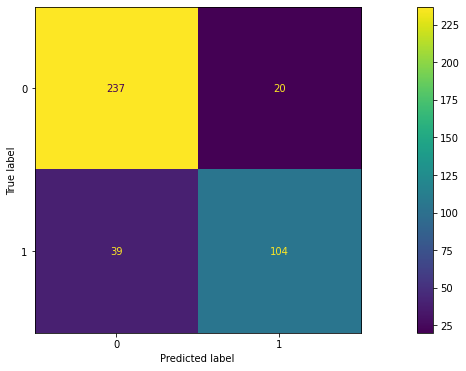

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = ConfusionMatrixDisplay(conf_mat)
fig.plot(ax= ax);

Class imbalance exists - with the purchased rate at 0.35, accuracy may not be reliable.  

We should consider using precision, recall and F1-score as they take into account the balance of the classes. Precision tells you the true positive rate. Recall tells you the actual posities out of all the positives You can also use ROC curve which plots the true positive rate over the false positive rate for different thresholds. It represents how well the logistic model differentiates between the two classes 


###### Out  of Sample

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=25)
log_reg = Logit(y_train,x_train).fit()

y_preds = log_reg.predict(x_test)

Optimization terminated successfully.
         Current function value: 0.346826
         Iterations 8


In [34]:
y_preds_flags = [0 if x<0.5 else 1 for x in y_preds]

In [35]:
conf_mat = (confusion_matrix(y_test, y_preds_flags))

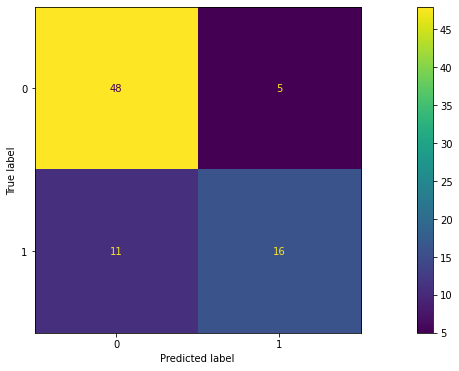

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = ConfusionMatrixDisplay(conf_mat)
fig.plot(ax= ax);

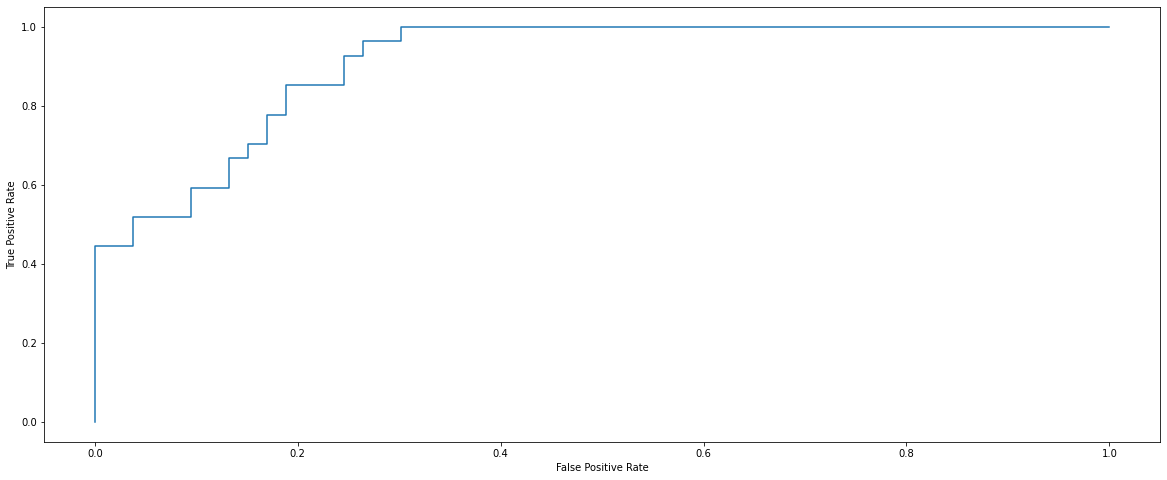

In [37]:
fig, ax = plt.subplots(figsize= (20,8))

fpr, tpr, thresholds = roc_curve(y_test, y_preds)

roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax);

##### Q5 Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 

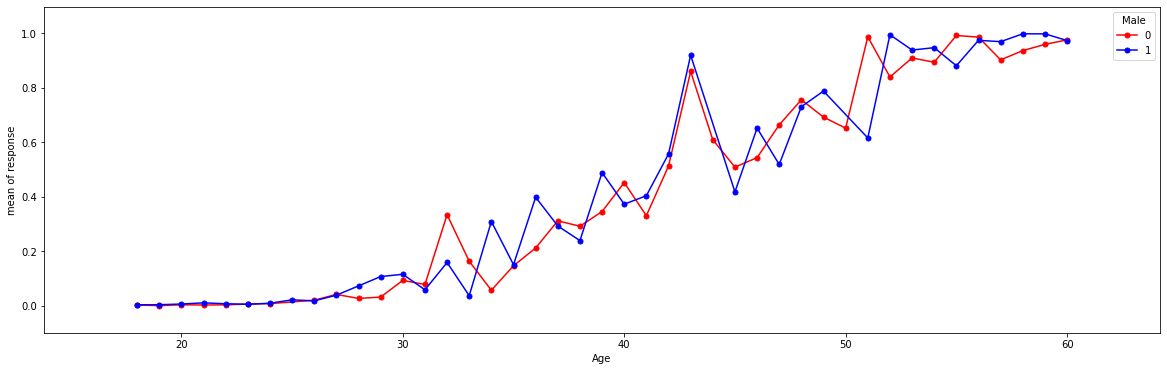

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sm.graphics.interaction_plot(
    x= x.Age,
    trace= x.Male,
    response=full_model.predict(),
    colors=["red", "blue"],
    ms=10,
    ax=ax,
)

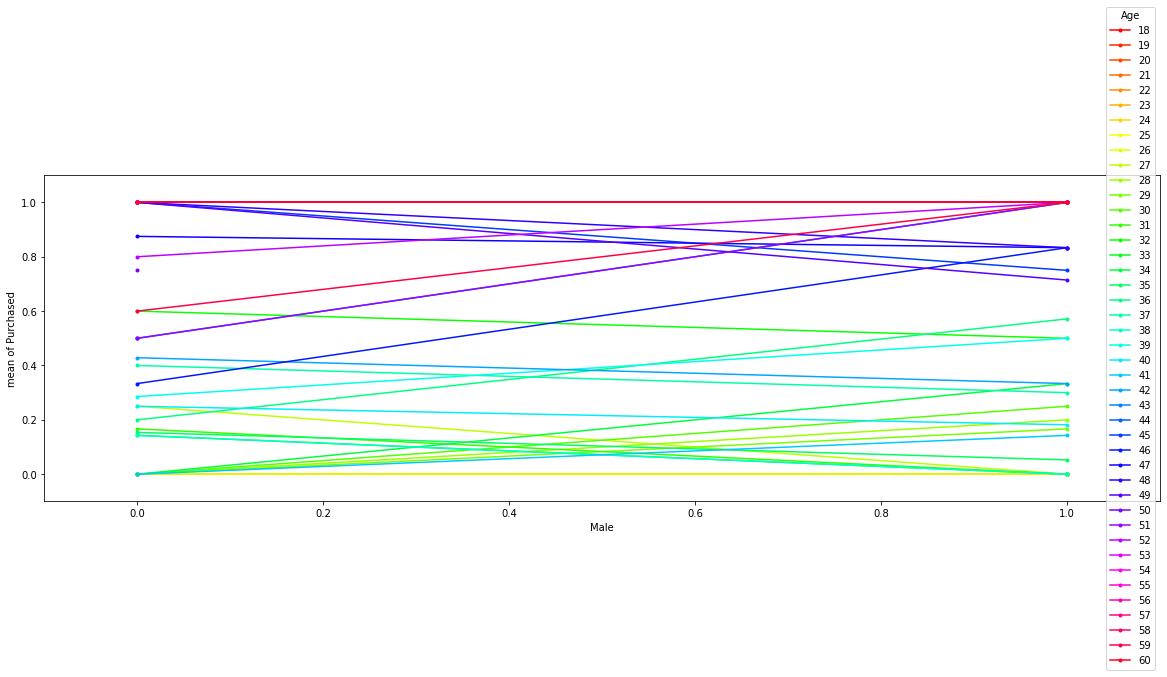

In [39]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sm.graphics.interaction_plot(x.Male, x.Age, y, legendloc='right',ax =ax)
plt.show()

The above graph can not explain interaction - do not consider this graph.

In [40]:
interactions = PolynomialFeatures(interaction_only=True, degree= 2)
X_interactions = interactions.fit_transform(x.iloc[:,[1,3]])

X_interactions = pd.DataFrame(X_interactions,columns=interactions.get_feature_names_out())
X_interactions.rename(columns= {"1":"const"}, inplace=True)

In [41]:
run_logit(X_interactions,y,cols= X_interactions.columns)



Optimization terminated successfully.
         Current function value: 0.426627
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.3485
Time:                        18:56:21   Log-Likelihood:                -136.52
converged:                       True   LL-Null:                       -209.55
Covariance Type:            nonrobust   LLR p-value:                 1.867e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8178      1.068     -6.381      0.000      -8.912      -4.724
Age            0.1584      0.

,Key,prsquared,AIC,BIC,oosrsquared
0,const-Age-Male-Age Male,0.348505,281.041456,296.11474,0.377518


The model above lets us build a interaction graph using the coefficients. The x, y scale is in log odds 

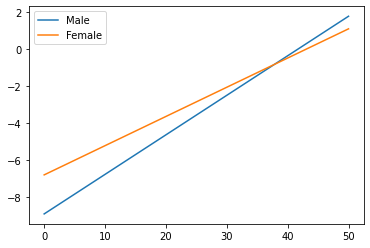

In [43]:
x = np.linspace(0.001, 50, 1000)

plt.plot(x, 0.2144*x -8.935, linestyle='solid')
plt.plot(x, 0.1584*x -6.8178, linestyle='solid')
plt.legend(["Male", "Female"]);

There is no interction here. The slopes of both the lines are in the same direction

#### Q6 The following plots show effect of Income and Change in savings on Likelihood of buying a house. Observe the three plots (a, b, c) shown and answer the following questions for each plot:

A) 

1. The regression may include interaction term. 

2. If you see clearly the last interaction line decreases as average salary increases. However the rest of the lines increase as the average salary increses. This is sign of interaction so it is best to check the significance of the interaction term. 

B) 

1. The regression should include interaction term.

2. It is clear that there is interaction effect here. One line increases and the other decreases as average salary increases. This is a sign of interaction effects, and we should always include the interaction term

C) 

1. The interaction should not be included in the model

2. The trend of the lines is identical to each other so there is no interactions, so there is 